## Analise de dados Airbnb - Barcelona

#### Airbnb
O Airbnb é uma plataforma online de hospedagem e aluguel fundada em agosto de 2008 por Brian Chesky, Joe Gebbia e Nathan Blecharczyk. O conceito surgiu em São Francisco, quando os fundadores decidiram alugar colchões em seu apartamento para participantes de uma conferência que estava superlotada na cidade. A ideia inicial evoluiu para uma plataforma global que conecta anfitriões e viajantes, permitindo que pessoas aluguem acomodações temporárias em todo o mundo.


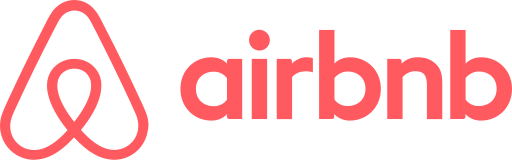

#### Barcelona
Barcelona é a capital da Catalunha, uma região autônoma da Espanha, e uma das cidades mais vibrantes e culturais do país. Localizada na costa nordeste da Espanha, ao longo do Mar Mediterrâneo, Barcelona é conhecida por sua rica herança arquitetônica, com influências de Antoni Gaudí e outros mestres modernistas.

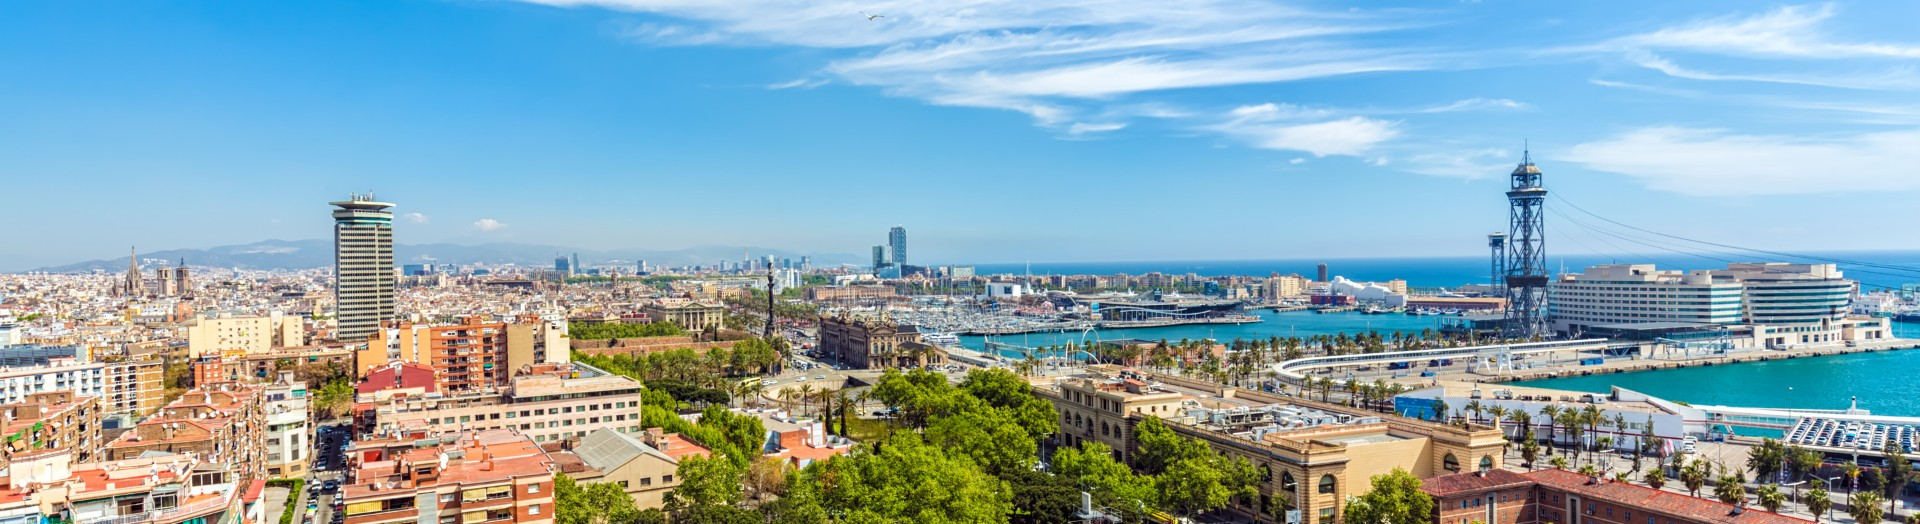

#### Objetivo

O objetivo desta análise é explorar esse dataset que contem informações sobre o mercado do Airbnb em Barcelona para entender como os preços variam, identificar possíveis outliers e ver a quantidade de imoveis e seus tipos em Barcelona.

In [1]:
# Frameworks
import pandas as pd
import numpy as np 

# Graficas
import matplotlib.pyplot as plt
import seaborn as sns

# Avisos
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
import warnings

warnings.filterwarnings("ignore")

# Layout
sns.set_theme(style ='whitegrid')
plt.rcParams['font.family'] = 'serif'

# Ajustes
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Importando o dataframe
df = pd.read_csv("Airbnb - Barcelona.csv", index_col=0)

- `id` - Um identificador exclusivo para cada anúncio do Airbnb.
- `host_id` - Um identificador exclusivo para o host do anúncio.
- `host_is_superhost` - Indica se o host tem status de superhost.
- `host_listings_count` - O número de anúncios que o anfitrião tem no Airbnb.
- `neighbourhood` - O bairro onde o host está localizado.
- `zipcode` - O código postal ou código postal do local do anúncio.
- `latitude` - Coordenadas geográficas do anúncio.
- `longitude` - Coordenadas geográficas do anúncio.
- `property_type` - O tipo de propriedade (por exemplo, apartamento, casa, vila).
- `room_type` - O tipo de quarto (por exemplo, casa inteira, quarto privado, quarto compartilhado).
- `accommodates` - O número máximo de hóspedes que o anúncio pode acomodar.
- `bathrooms` - Banheiro
- `beds` - Cama
- `bedrooms` - Quarto
- `amenities` - Uma lista de comodidades e recursos oferecidos pelo anúncio.
- `price` - Preço
- `minimum_nights` - Número mínimo e máximo de noites que os hóspedes podem reservar.
- `has_availability` - Indica se o anúncio está disponível para reserva.


In [3]:
# Vizualizando o dataframe
df.head()

,id,host_id,host_is_superhost,host_listings_count,neighbourhood,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights
0,18666,71615,f,45.00,Sant Martí,8026,41.41,2.19,Apartment,Entire home/apt,6,1.00,2.00,4.00,"['TV', 'Internet', 'Wifi', 'Air conditioning',...",$130.00,3
1,18674,71615,f,45.00,La Sagrada Família,8025,41.40,2.17,Apartment,Entire home/apt,8,2.00,3.00,6.00,"['TV', 'Internet', 'Wifi', 'Air conditioning',...",$60.00,1
2,21605,82522,f,2.00,Sant Martí,8018,41.41,2.20,Apartment,Private room,2,1.00,1.00,1.00,"['TV', 'Wifi', 'Kitchen', 'Paid parking off pr...",$33.00,2
3,23197,90417,t,5.00,Sant Martí,8930,41.41,2.22,Apartment,Entire home/apt,6,2.00,3.00,8.00,"['TV', 'Internet', 'Wifi', 'Wheelchair accessi...",$210.00,3
4,25786,108310,t,1.00,Vila de Gràcia,8012,41.40,2.16,Apartment,Private room,2,1.00,1.00,1.00,"['TV', 'Wifi', 'Air conditioning', 'Kitchen', ...",$45.00,1


In [4]:
print(f'A base de dados possui: \n{df.shape[0]} Linhas \n{df.shape[1]} Colunas')

A base de dados possui: 
19833 Linhas 
17 Colunas


In [5]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19833 entries, 0 to 19832
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   19833 non-null  int64  
 1   host_id              19833 non-null  int64  
 2   host_is_superhost    19799 non-null  object 
 3   host_listings_count  19799 non-null  float64
 4   neighbourhood        19823 non-null  object 
 5   zipcode              19229 non-null  object 
 6   latitude             19833 non-null  float64
 7   longitude            19833 non-null  float64
 8   property_type        19833 non-null  object 
 9   room_type            19833 non-null  object 
 10  accommodates         19833 non-null  int64  
 11  bathrooms            19824 non-null  float64
 12  bedrooms             19830 non-null  float64
 13  beds                 19799 non-null  float64
 14  amenities            19833 non-null  object 
 15  price                19833 non-null  obje

In [6]:
df['price'].unique()

array(['$130.00', '$60.00', '$33.00', '$210.00', '$45.00', '$42.00',
       '$53.00', '$75.00', '$85.00', '$30.00', '$140.00', '$80.00',
       '$250.00', '$40.00', '$38.00', '$95.00', '$35.00', '$180.00',
       '$116.00', '$105.00', '$190.00', '$90.00', '$49.00', '$110.00',
       '$390.00', '$1,000.00', '$148.00', '$300.00', '$65.00', '$70.00',
       '$139.00', '$125.00', '$107.00', '$62.00', '$350.00', '$160.00',
       '$135.00', '$129.00', '$200.00', '$220.00', '$230.00', '$48.00',
       '$14.00', '$50.00', '$39.00', '$150.00', '$149.00', '$115.00',
       '$27.00', '$340.00', '$46.00', '$20.00', '$21.00', '$310.00',
       '$100.00', '$178.00', '$120.00', '$77.00', '$55.00', '$32.00',
       '$44.00', '$83.00', '$41.00', '$23.00', '$89.00', '$175.00',
       '$900.00', '$184.00', '$36.00', '$51.00', '$290.00', '$72.00',
       '$215.00', '$106.00', '$225.00', '$196.00', '$47.00', '$25.00',
       '$69.00', '$126.00', '$119.00', '$28.00', '$111.00', '$18.00',
       '$137.00', 

A coluna `price` está como tipo objeto e isso atrapalha em algumas analises futuras, para isso precisamos remover o "$" e substituir o "," para ".".

### Tratamento dos dados

In [7]:
# Removendo o "$" e substituindo a "," por "." da coluna price para que eu possa alterar a coluna como numerico
df['price'] = df['price'].apply(lambda x: x.replace("$", ""))
df['price'] = df['price'].apply(lambda x: x.replace(",", "."))

df['price'].head()

0    130.00
1     60.00
2     33.00
3    210.00
4     45.00
Name: price, dtype: object

Como podemos ver a coluna price está definida como "Object", vamos altera para numerico para que a gente possa fazer calculos com essa coluna.

In [8]:
# Convertendo para numerico
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'].dtype

dtype('float64')

In [9]:
# Quantidade de valores nulos
df.isnull().sum()

id                       0
host_id                  0
host_is_superhost       34
host_listings_count     34
neighbourhood           10
zipcode                604
latitude                 0
longitude                0
property_type            0
room_type                0
accommodates             0
bathrooms                9
bedrooms                 3
beds                    34
amenities                0
price                  190
minimum_nights           0
dtype: int64

Vemos que temos alguns dados faltantes, vamos tratar esses dados

In [10]:
# Calcular média e mediana da coluna price
media_price = df['price'].mean()
mediana_price = df['price'].median()

print(f'A media de price é {media_price}')
print(f'A mediana de price é {mediana_price}')

A media de price é 95.20027490709158
A mediana de price é 65.0


In [11]:
# Preencher os dados faltantes com a media
df['price'].fillna(media_price, inplace=True)    

Agora vou preencher as colunas `bedrooms`, `beds` e `bathrooms`

In [12]:
# Calcular média e mediana da coluna bedrooms
media_bedrroms = df['bedrooms'].mean()
mediana_bedrroms = df['bedrooms'].median()

print(f'A media de bedrooms é {media_bedrroms}')
print(f'A mediana de bedrooms é {mediana_bedrroms}\n')

# Calcular média e mediana da coluna bedrooms
media_beds = df['beds'].mean()
mediana_beds = df['beds'].median()

print(f'A media de beds é {media_beds}')
print(f'A mediana de beds é {mediana_beds}\n')

# Calcular média e mediana da coluna bathrooms
media_bathrooms = df['bathrooms'].mean()
mediana_bathrooms = df['bathrooms'].median()

print(f'A media de bathrooms é {media_bathrooms}')
print(f'A mediana de bathrooms é {mediana_bathrooms}')

A media de bedrooms é 1.5675743822491175
A mediana de bedrooms é 1.0

A media de beds é 2.257689782312238
A mediana de beds é 2.0

A media de bathrooms é 1.3178470540758676
A mediana de bathrooms é 1.0


In [13]:
# preencher a coluna bedrooms com a mediana
df['bedrooms'].fillna(mediana_bedrroms, inplace=True)    

# preencher a coluna beds com a mediana
df['beds'].fillna(mediana_beds, inplace=True)

# preencher a coluna bathrooms com a mediana
df['bathrooms'].fillna(mediana_bathrooms, inplace=True)

Agora vou preencher a coluna `neighbourhood` que representa o bairro onde o Airbnb está localizado, atraves do zipcode, latitude e longtide eu consigo ter uma base da onde fica localizado pesquisando na internet

In [14]:
df[df['neighbourhood'].isnull()]

,id,host_id,host_is_superhost,host_listings_count,neighbourhood,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights
52,107437,556626,t,2.00,NaN,8017,41.43,2.09,Villa,Entire home/apt,8,2.00,4.00,6.00,"['TV', 'Wifi', 'Kitchen', 'Free parking on pre...",160.00,3
171,342641,1738696,f,3.00,NaN,8197,41.43,2.10,Guest suite,Entire home/apt,4,1.00,1.00,1.00,"['TV', 'Cable TV', 'Wifi', 'Pool', 'Kitchen', ...",90.00,2
1140,1370332,7431149,t,2.00,NaN,8017,41.43,2.10,House,Private room,4,2.00,1.00,2.00,"['TV', 'Wifi', 'Kitchen', 'Smoking allowed', '...",53.00,3
1376,1783526,9361937,t,1.00,NaN,8198,41.42,2.10,Chalet,Entire home/apt,8,3.00,4.00,5.00,"['TV', 'Cable TV', 'Wifi', 'Air conditioning',...",290.00,4
4882,11503006,9803148,t,1.00,NaN,8017,41.43,2.09,House,Private room,2,1.00,1.00,1.00,"['Internet', 'Wifi', 'Kitchen', 'Free parking ...",50.00,2
5710,13811018,81287680,t,1.00,NaN,8196,41.42,2.09,House,Private room,1,1.00,1.00,1.00,"['Wifi', 'Kitchen', 'Free street parking', 'He...",20.00,1
6958,17239788,35762485,f,22.00,NaN,8006,41.40,2.15,Apartment,Private room,2,1.00,1.00,1.00,"['Wifi', 'Paid parking off premises', 'Pets li...",35.00,3
12629,27217399,7648663,f,2.00,NaN,8017,41.42,2.10,House,Entire home/apt,4,1.00,2.00,3.00,"['TV', 'Wifi', 'Kitchen', 'Free parking on pre...",125.00,31
12928,27775773,209574281,f,1.00,NaN,8196,41.43,2.10,Villa,Entire home/apt,6,3.00,3.00,5.00,"['TV', 'Wifi', 'Air conditioning', 'Pool', 'Ki...",350.00,5
13157,28292731,6743231,f,1.00,NaN,8017,41.43,2.09,House,Private room,1,1.00,3.00,1.00,"['Wifi', 'Kitchen', 'Free parking on premises'...",25.00,2


In [15]:
df.loc[52, 'neighbourhood'] = 'Vallvidrera'
df.loc[171, 'neighbourhood'] = 'Valldoreix'
df.loc[1140, 'neighbourhood'] = 'Vallvidrera'
df.loc[1376, 'neighbourhood'] = 'La Floresta'
df.loc[4882, 'neighbourhood'] = 'Vallvidrera'
df.loc[5710, 'neighbourhood'] = 'Les Planes'
df.loc[6958, 'neighbourhood'] = 'El Farró'
df.loc[12629, 'neighbourhood'] = 'Sarrià-Sant Gervasi'
df.loc[12928, 'neighbourhood'] = 'Les Planes'
df.loc[13157, 'neighbourhood'] = 'Sarrià-Sant Gervasi'

In [16]:
df[df['host_listings_count'].isnull()]

,id,host_id,host_is_superhost,host_listings_count,neighbourhood,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights
10,32711,135703,NaN,NaN,Gràcia,8025,41.40,2.17,Apartment,Entire home/apt,6,1.50,2.00,7.00,"['TV', 'Cable TV', 'Internet', 'Wifi', 'Air co...",140.00,2
21,49968,135703,NaN,NaN,Eixample,8025,41.41,2.17,Apartment,Entire home/apt,6,1.00,2.00,7.00,"['TV', 'Cable TV', 'Internet', 'Wifi', 'Air co...",140.00,2
22,50066,135703,NaN,NaN,Eixample,8013,41.40,2.18,Apartment,Entire home/apt,9,1.50,3.00,7.00,"['TV', 'Cable TV', 'Internet', 'Wifi', 'Air co...",180.00,2
37,73683,135703,NaN,NaN,Gràcia,8025,41.41,2.17,Apartment,Entire home/apt,12,2.00,4.00,14.00,"['TV', 'Cable TV', 'Internet', 'Wifi', 'Air co...",300.00,2
254,478951,135703,NaN,NaN,Eixample,8013,41.40,2.18,Apartment,Entire home/apt,8,1.50,3.00,7.00,"['TV', 'Internet', 'Wifi', 'Air conditioning',...",180.00,2
694,927472,135703,NaN,NaN,Eixample,8013,41.40,2.18,Apartment,Entire home/apt,8,1.50,3.00,9.00,"['TV', 'Internet', 'Wifi', 'Air conditioning',...",180.00,2
696,927680,135703,NaN,NaN,el Fort Pienc,8013,41.40,2.18,Apartment,Entire home/apt,16,2.00,6.00,18.00,"['TV', 'Internet', 'Wifi', 'Air conditioning',...",320.00,2
1090,1307947,7110050,NaN,NaN,El Born,8003,41.39,2.18,Apartment,Private room,2,1.00,1.00,1.00,"['Wifi', 'Kitchen', 'Pets live on this propert...",57.00,30
1566,2134241,135703,NaN,NaN,el Fort Pienc,8013,41.40,2.18,Apartment,Entire home/apt,6,2.50,3.00,8.00,"['TV', 'Internet', 'Wifi', 'Air conditioning',...",140.00,2
1569,2144561,135703,NaN,NaN,Eixample,8013,41.40,2.18,Apartment,Entire home/apt,16,5.00,12.00,26.00,"['TV', 'Internet', 'Wifi', 'Air conditioning',...",740.00,2


Vizualizando o dataset só com os valores vazios, a gente pode ver que as duas colunas tem valores vazios igualmente, eu vou preencher a coluna `host_listings_count` com a mediana e a coluna `host_is_superhost` por ser tratar de valores não numericos, sendo eles "t" = true e "f" = false, vou preencher com o que é mais frequente.


In [17]:
# Calcular a mediana da coluna host_listings_count
mediana_host_listings_count = df['host_listings_count'].median()
print(f'A mediana de host_listings_count é {mediana_host_listings_count}\n')

# Valor mais frequentte
frequencia_superhost = df['host_is_superhost'].mode()[0]
print(f'Valor frequente = {frequencia_superhost}')

A mediana de host_listings_count é 3.0

Valor frequente = f


In [18]:
# preencher a coluna host_listings_count com a mediana
df['host_listings_count'].fillna(mediana_host_listings_count, inplace=True)
df['host_is_superhost'].fillna(frequencia_superhost, inplace=True)

In [19]:
# Verificar dados ausentes
df.isnull().sum()

id                       0
host_id                  0
host_is_superhost        0
host_listings_count      0
neighbourhood            0
zipcode                604
latitude                 0
longitude                0
property_type            0
room_type                0
accommodates             0
bathrooms                0
bedrooms                 0
beds                     0
amenities                0
price                    0
minimum_nights           0
dtype: int64

O unico que sobrou é o `zipcode` mas não irei mexer, ele não irá interfirir nas analises e tambem não é viavel eu excluir esses dados, porque poderia perder muitos insights importantes para a analise.

## Tratando outliers

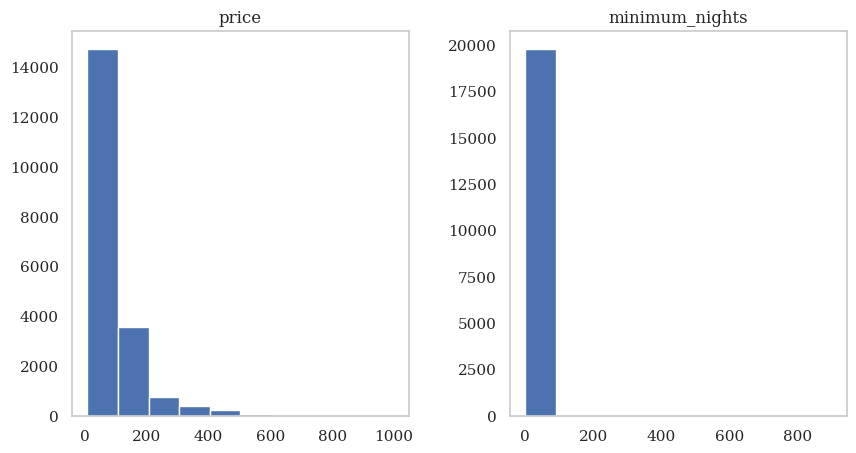

In [20]:
df[['price', 'minimum_nights']].hist(figsize = (10, 5), grid=False);

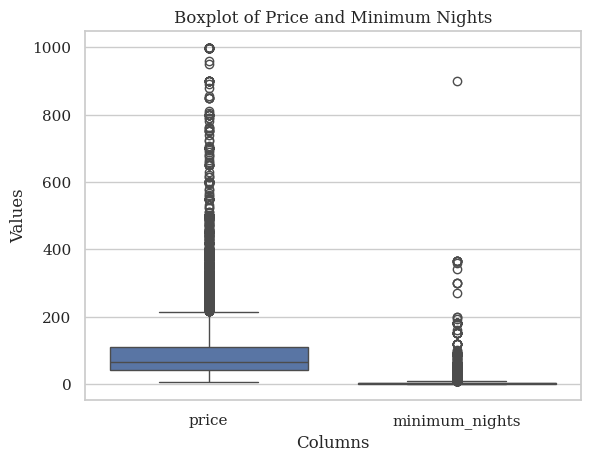

In [21]:
# Boxplot para as colunas 'price' e 'minimum_nights'
sns.boxplot(data=df[['price', 'minimum_nights']])

# Adicionar título e rótulos
plt.title('Boxplot of Price and Minimum Nights')
plt.xlabel('Columns')
plt.ylabel('Values')

# Exibir o gráfico
plt.show();

In [22]:
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,"19,833.00","19,833.00"
mean,95.20,8.52
std,101.40,17.96
min,7.00,1.00
25%,40.00,1.00
50%,65.00,2.00
75%,110.00,4.00
max,999.00,900.00


estamos vendo que o Q3 da `price` está em 110 dólares, mas o máximo está em 999 doláres. Claramente, há outliers por aqui. o que tambem serve para `minimum_nights`



### Price

In [23]:
# Verificandoo iqr da variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
iqr_price = q3_price - q1_price
print('iqr da variável price:' , iqr_price)

# Definindo os limites superiores e inferiores
superior_price = q3_price + 1.5 * iqr_price
inferior_price = q1_price - 1.5 * iqr_price

print('Limite superior do price: ', superior_price)
print('Limite inferior do price: ', inferior_price)

iqr da variável price: 70.0
Limite superior do price:  215.0
Limite inferior do price:  -65.0


In [24]:
# Contando quantos outliers
outliers = len(df[df.price > 215.0])

# Porcentagem de outliers
total = df.shape[0]
porcentagem_total = (outliers / total)*100

print(f"O dataset possui {outliers} Entradas acima de 215.0, o que representam {porcentagem_total:.2f}% do dataset")



O dataset possui 1462 Entradas acima de 215.0, o que representam 7.37% do dataset


In [25]:
# copiar o dataset
df_2 = df.copy()

# excluir valores acima do limite superior
df_2.drop(df_2[df_2.price > 215.0].index, axis=0, inplace=True)

### Minium_nights

In [26]:
# Verificandoo iqr da variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
iqr_minimum_nights = q3_minimum_nights - q1_minimum_nights

# Definindo os limites superiores e inferiores
superior_minimum_nights = q3_minimum_nights + 1.5 * iqr_minimum_nights
inferior_minimum_nights = q1_minimum_nights - 1.5 * iqr_minimum_nights

print('Limite superior do minimum_nights: ', superior_minimum_nights)
print('Limie inferior do minimum_nights: ', inferior_minimum_nights)


Limite superior do minimum_nights:  8.5
Limie inferior do minimum_nights:  -3.5


In [27]:
# Contando quantos outliers
outliers = len(df[df.minimum_nights > 9])

# Porcentagem de outliers
total = df.shape[0]
porcentagem_total = (outliers / total)*100

print(f"O dataset possui {outliers} Entradas acima de 9, o que representam {porcentagem_total:.2f}% do dataset")

O dataset possui 3786 Entradas acima de 9, o que representam 19.09% do dataset


In [28]:
# Excluir valores acima do limite superior
df_2.drop(df_2[df_2.minimum_nights > 9].index, axis=0, inplace=True)

In [29]:
print('Dataset antes da limpeza: ', df.shape)
print('Dataset após a limpeza: ',df_2.shape)

Dataset antes da limpeza:  (19833, 17)
Dataset após a limpeza:  (14664, 17)


### Mapeando os bairros por distritos de Barcelona

Vou mapear os bairros de Barcelona por distrito pra ter uma visão geral

In [30]:
map_distritos = {
    "Dreta de l'Eixample": 'Eixample',               
    'Les Tres Torres': 'Sarrià-Sant Gervasi',                   
    'La Vila Olímpica': 'Sant Martí',                   
    'Valldoreix': 'Valldoreix',                        
    'Vallvidrera': 'Sarrià-Sant Gervasi',                        
    'Eixample': 'Eixample',                           
    'Diagonal Mar - La Mar Bella': 'Sant Martí',        
    "L'Antiga Esquerra de l'Eixample": 'Eixample',   
    'Vila de Gràcia': 'Gràcia',                   
    'La Sagrada Família': 'Eixample',                
    'El Poblenou': 'Sant Martí',                        
    'Sarrià-Sant Gervasi': 'Sarrià-Sant Gervasi',               
    'Sant Antoni': 'Eixample',                      
    'Gràcia': 'Gràcia',                             
    'Les Corts': 'Les Corts',                          
    'Sant Gervasi - Galvany': 'Sarrià-Sant Gervasi',            
    "Camp d'en Grassot i Gràcia Nova": 'Gràcia',   
    'El Putget i Farró': 'Sarrià-Sant Gervasi',                  
    "La Nova Esquerra de l'Eixample": 'Eixample',   
    'Sant Gervasi - la Bonanova': 'Sarrià-Sant Gervasi',       
    'El Born': 'Ciutat Vella',                          
    'El Gòtic': 'Ciutat Vella',                           
    'Ciutat Vella': 'Ciutat Vella',                       
    'Provençals del Poblenou': 'Sant Martí',           
    "El Camp de l'Arpa del Clot": 'Sant Martí',         
    'Sant Martí': 'Sant Martí',                        
    "Sant Pere/Santa Caterina": 'Ciutat Vella',           
    'El Poble-sec': 'Sants-Montjuïc',                    
    'el Fort Pienc': 'Eixample',                      
    'El Raval': 'Ciutat Vella',                           
    'Glòries - El Parc': 'Sant Martí',                  
    'Sants-Montjuïc': 'Sants-Montjuïc',                     
    'Sarrià': 'Sarrià-Sant Gervasi',                            
    'La Barceloneta': 'Ciutat Vella',                     
    'La Maternitat i Sant Ramon': 'Les Corts',       
    'La Salut': 'Gràcia',                          
    'El Baix Guinardó': 'Horta-Guinardó',                  
    'Pedralbes': 'Les Corts',                         
    'Vallcarca i els Penitents': 'Gràcia',        
    'Guinardó': 'Horta-Guinardó',                          
    'Can Baro': 'Horta-Guinardó',                          
    'Sant Martí de Provençals': 'Sant Martí',          
    'Horta-Guinardó': 'Horta-Guinardó',                    
    'El Coll': 'Gràcia',                         
    'Sant Andreu de Palomar': 'Sant Andreu',           
    'El Clot': 'Sant Martí',                           
    'Sant Genís dels Agudells': 'Horta-Guinardó',           
    "La Font d'en Fargues": 'Horta-Guinardó',               
    'El Congrés i els Indians': 'Sant Andreu',          
    'Turó de la Peira - Can Peguera': 'Nou Barris',    
    'La Prosperitat': 'Nou Barris',                     
    'Vilapicina i la Torre Llobeta': 'Nou Barris',      
    'La Verneda i La Pau': 'Sant Martí',               
    'Sant Andreu': 'Sant Andreu',                        
    'La Guineueta - Canyelles': 'Nou Barris',         
    'La Sagrera': 'Sant Andreu',                         
    'Carmel': 'Horta-Guinardó',                             
    'Nou Barris': 'Nou Barris',                        
    'El Besòs i el Maresme': 'Sant Martí',              
    'Horta': 'Horta-Guinardó',                             
    'La Teixonera': 'Horta-Guinardó',                       
    'Navas':'Sant Andreu',                              
    'Verdum - Los Roquetes': 'Nou Barris',             
    "La Vall d'Hebron": 'Horta-Guinardó',                  
    'La Trinitat Vella': 'Sant Andreu',                 
    'Porta': 'Nou Barris',                            
    'El Farró': 'Sarrià-Sant Gervasi',                          
    'Torre Baró': 'Nou Barris',                         
    'Montbau': 'Horta-Guinardó',                            
    'Trinitat Nova': 'Nou Barris',                     
    'El Bon Pastor': 'Sant Andreu',                      
    'Les Planes': 'Sarrià-Sant Gervasi'                 
}

# Adicionar a coluna de distritos com base no mapeamento
df_2['Distritos'] = df_2['neighbourhood'].map(map_distritos)

### Media de preços dos Airbnb de Barcelona

In [31]:
media_preco = df_2['price'].mean()

print(f'A media de preços dos Airbnb é de {media_preco:.2f} Doláres')
print('O que convertido está em torno de 429,84 Reais')

A media de preços dos Airbnb é de 75.04 Doláres
O que convertido está em torno de 429,84 Reais


In [32]:
# Média de preço por distritos
df_2.groupby(['Distritos']).price.mean().sort_values(ascending = False)

Distritos
Valldoreix            90.00
Eixample              85.50
Gràcia                78.21
Sarrià-Sant Gervasi   77.95
Les Corts             72.97
Ciutat Vella          71.73
Sant Martí            71.20
Sants-Montjuïc        67.78
Horta-Guinardó        52.55
Sant Andreu           43.61
Nou Barris            42.05
Name: price, dtype: float64

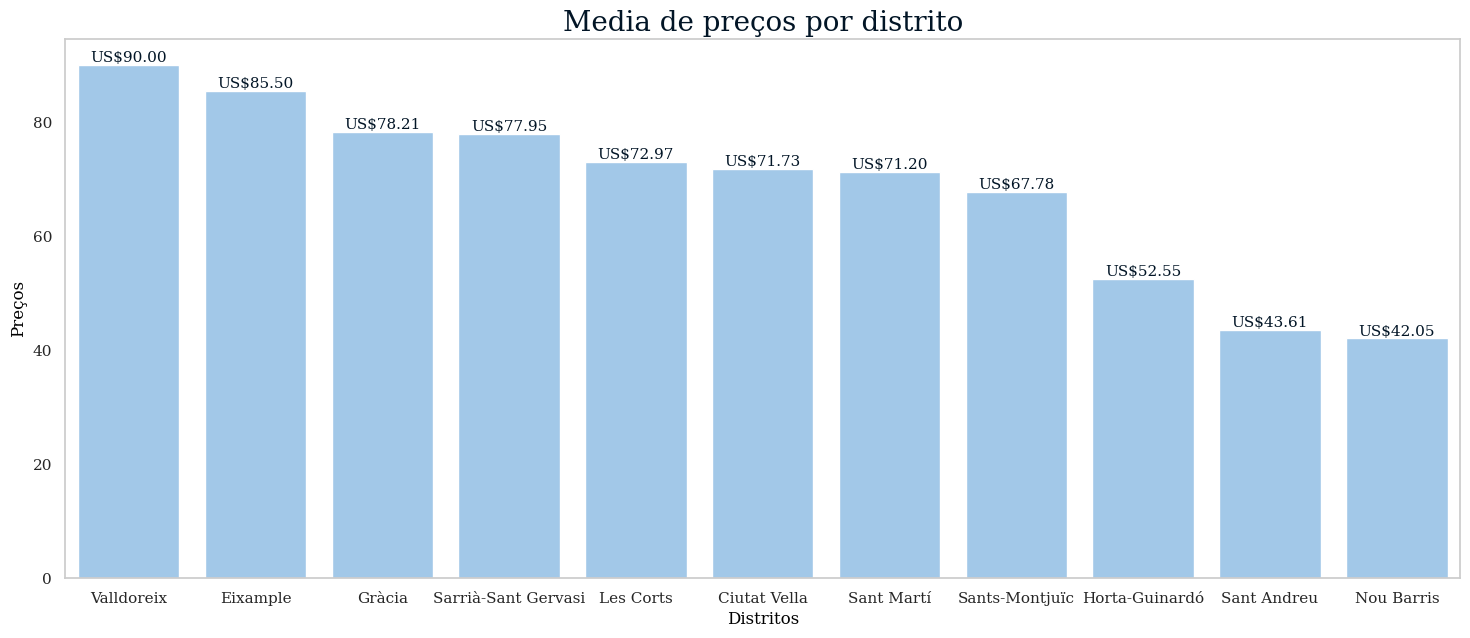

In [33]:
media_distrito = df_2.groupby(['Distritos']).price.mean().sort_values(ascending = False).reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(18, 7))
ax = sns.barplot(x='Distritos', y='price', data=media_distrito, color='#96C9F4')
ax.grid(False)

# Adicionando rótulos de dados
for index, value in enumerate(media_distrito['price']):
    ax.text(index, value, f'US${value:.2f}', color='#021526', fontsize=11, va='bottom', ha='center')

    
plt.title('Media de preços por distrito', color= "#021526", fontsize=20)
plt.xlabel('Distritos', color= "Black")
plt.ylabel('Preços', color= "Black")
plt.show();

### Quantidade de Airbnbs por distrito

In [34]:
# Quantidades de airbnb por distrito
df_2.Distritos.value_counts(ascending = False)   

Distritos
Eixample               4910
Ciutat Vella           3014
Sants-Montjuïc         1910
Sant Martí             1685
Gràcia                 1331
Sarrià-Sant Gervasi     517
Horta-Guinardó          499
Les Corts               333
Sant Andreu             268
Nou Barris              196
Valldoreix                1
Name: count, dtype: int64

Eu vou desconsiderar `Valldoreix` porque ele não faz parte dos distritos de Barcelona então o distrito `Eixample` é o que tem o preço médio maior em relação aos outros distritos

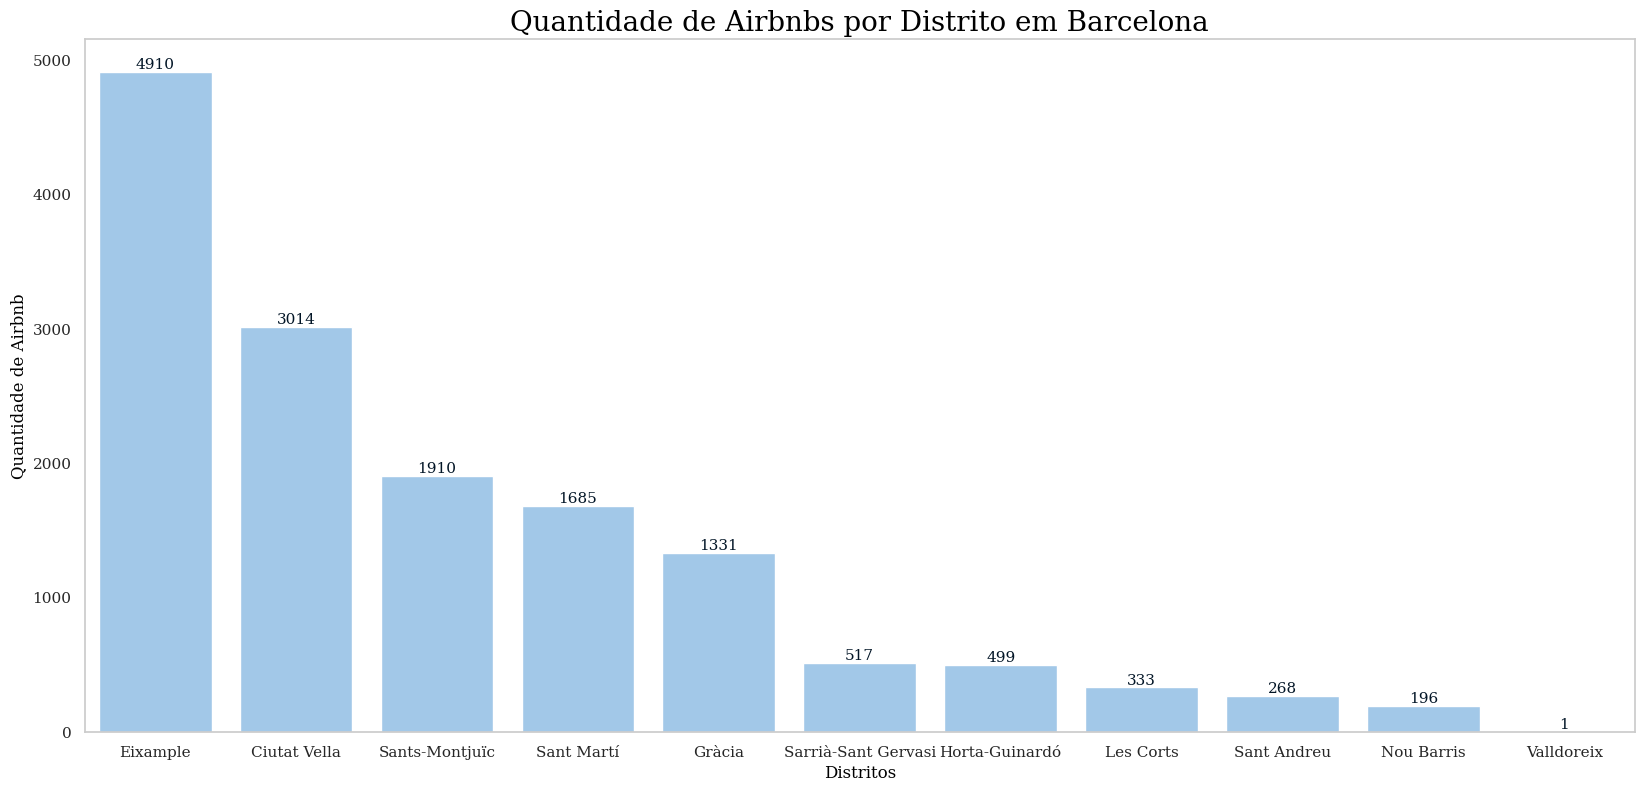

In [35]:
# Contagem de quantidade de Airbnbs por distrito
contagem_distrito = df_2.Distritos.value_counts(ascending = False).reset_index()
contagem_distrito.columns = ['Distrito', 'Quantidade']

# Plotando o gráfico de barras
plt.figure(figsize=(20, 9))
ax = sns.barplot(x='Distrito', y='Quantidade', data=contagem_distrito, color='#96C9F4')
ax.grid(False)

# Adicionando rótulos de dados
for index, value in enumerate(contagem_distrito['Quantidade']):
    ax.text(index, value, str(value), va='bottom', ha='center', fontsize=11, color='#021526')
    
    
plt.title('Quantidade de Airbnbs por Distrito em Barcelona', color="Black", fontsize=20)
plt.xlabel('Distritos', color="Black")
plt.ylabel('Quantidade de Airbnb', color="Black")
plt.show();

### Noites reservadas 

In [36]:
print(f'O mínimo de noites é {df_2.minimum_nights.min()}.')
print(f'A média de noites são {df_2.minimum_nights.mean():.2f}.')
print(f'O máximo de noites são {df_2.minimum_nights.max()}.')

O mínimo de noites é 1.
A média de noites são 2.15.
O máximo de noites são 9.


### Tipo de imóvel disponivel

In [37]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_2.room_type.value_counts().sort_values(ascending = False)

room_type
Private room       9024
Entire home/apt    5445
Shared room         195
Name: count, dtype: int64

In [38]:
# Porcentagem 
df_2.room_type.value_counts()/df_2.shape[0] * 100

room_type
Private room      61.54
Entire home/apt   37.13
Shared room        1.33
Name: count, dtype: float64

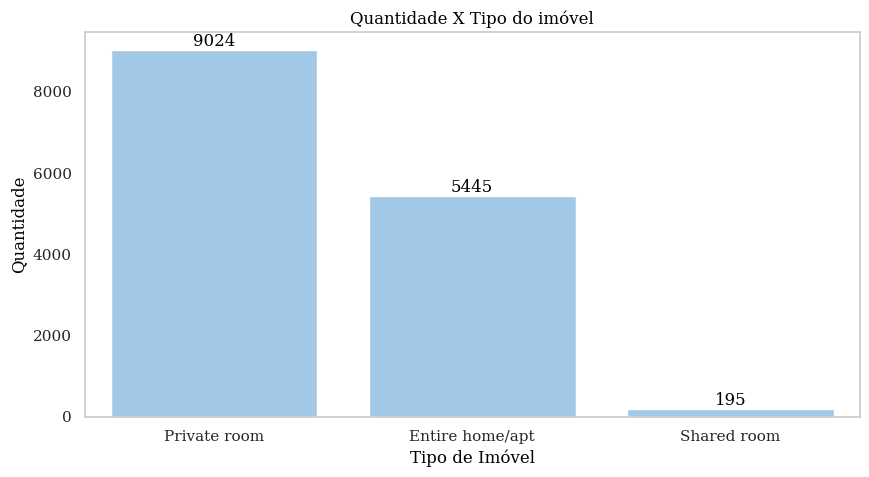

In [39]:
# Contagem de quantidade de cada tipo de imóvel disponível
imovel = df_2.room_type.value_counts().sort_values(ascending = False).reset_index()
imovel.columns = ['room_type', 'Quantidade']

# Plotando o gráfico de barras
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='room_type', y='Quantidade', data=imovel, color='#96C9F4')
ax.grid(False)

# Adicionando rótulos de dados
for index, value in enumerate(imovel['Quantidade']):
    ax.text(index, value, str(value), color='black', ha='center', va='bottom')

    
plt.title('Quantidade X Tipo do imóvel', color="Black")
plt.xlabel('Tipo de Imóvel', color="Black")
plt.ylabel('Quantidade', color="Black")
plt.show();

### Preço médio por tipo de imóvel

In [40]:
# Média de preços x Tipo de imóvel
df_2.groupby('room_type').price.mean().sort_values(ascending=False)

room_type
Entire home/apt   115.19
Private room       51.54
Shared room        41.11
Name: price, dtype: float64

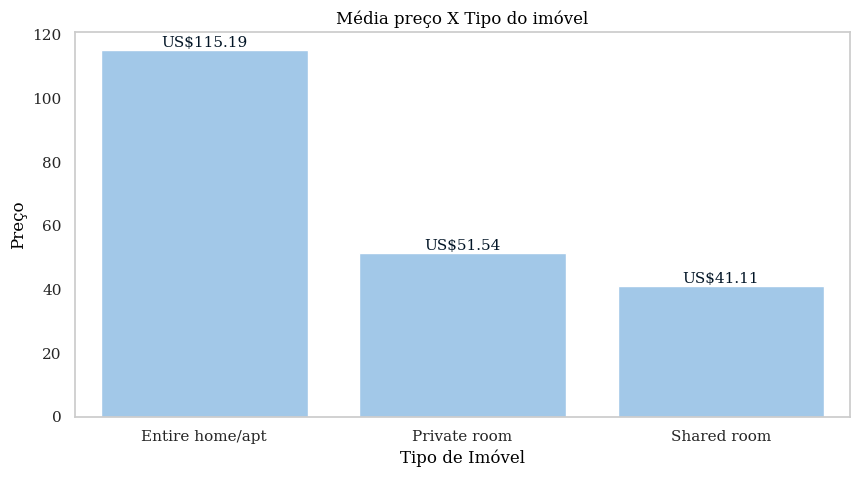

In [41]:
imovel_price = df_2.groupby('room_type').price.mean().sort_values(ascending = False).reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='room_type', y='price', data=imovel_price, color='#96C9F4')
ax.grid(False)

# Adicionando rótulos de dados
for index, value in enumerate(imovel_price['price']):
    ax.text(index, value, f'US${value:.2f}', color='#021526', fontsize=11, va='bottom', ha='center')

    
plt.title('Média preço X Tipo do imóvel', color="Black")
plt.xlabel('Tipo de Imóvel', color="Black")
plt.ylabel('Preço', color="Black")
plt.show();

### Mapa de Calor dos Preços dos Imóveis de Barcelona

Abaixo, podemos ver os Airbnb mais caros em Barcelona, em que há pontos mais rosado representa, na escala do lado direito, valores de aluguéis mais elevados.

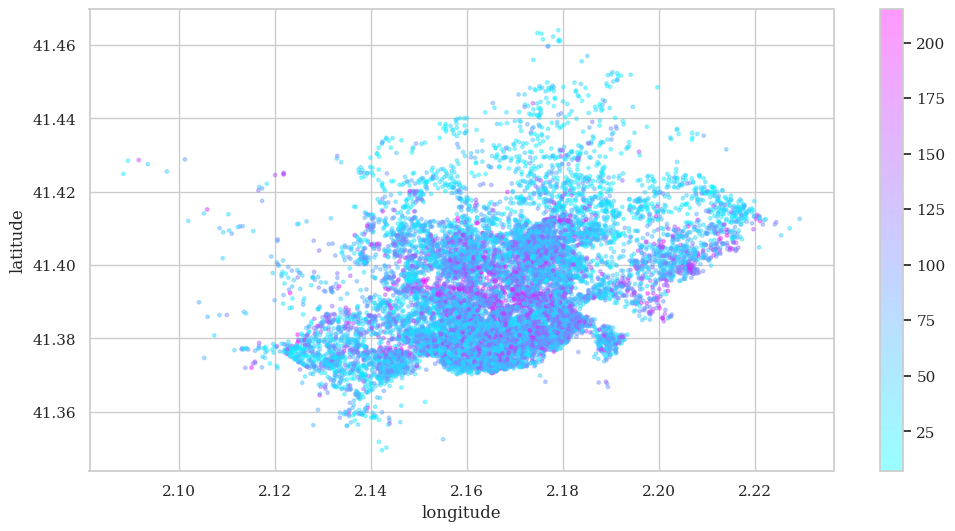

In [42]:
# Preço de imóveis pela latitude-longitude
df_2.plot(kind="scatter", 
              x='longitude',  
              y='latitude', 
              alpha=0.4, 
              c=df_2['price'], 
              s=6,
              cmap=plt.get_cmap('cool'), 
              figsize=(12, 6));